## 네이버 블로그 제목, url 수집

In [1]:
import sys
import os

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
from tqdm import tqdm_notebook

In [2]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://naver.com')

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/674436145.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../driver/chromedriver.exe')


In [3]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?:')

1.크롤링할 키워드는 무엇입니까?:여행


In [4]:
query_txt="여행"

In [5]:
element=driver.find_element_by_id("query")
element.send_keys(query_txt)
element.submit()
time.sleep(1)

driver.find_element_by_link_text("VIEW").click()
time.sleep(1)

driver.find_element_by_link_text("블로그").click()
time.sleep(1)

driver.find_element_by_link_text("옵션").click()
time.sleep(1)

driver.find_element_by_link_text("1년").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/1258432067.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element=driver.find_element_by_id("query")
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/1258432067.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("VIEW").click()
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/1258432067.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("블로그").click()
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/1258432067.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("옵션").click()
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_1296/1258432067.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

In [6]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 19431049)")
    time.sleep(1)
    
n = 50
i = 0
while i < n :
    scroll_down(driver)
    i = i+1

WebDriverException: Message: chrome not reachable
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x00406903+2517251]
	Ordinal0 [0x0039F8E1+2095329]
	Ordinal0 [0x002A2710+1058576]
	Ordinal0 [0x002976A4+1013412]
	Ordinal0 [0x00297EA8+1015464]
	Ordinal0 [0x00299695+1021589]
	Ordinal0 [0x00293686+996998]
	Ordinal0 [0x002A3A60+1063520]
	Ordinal0 [0x002F5382+1397634]
	Ordinal0 [0x002E639B+1336219]
	Ordinal0 [0x002C27A7+1189799]
	Ordinal0 [0x002C3609+1193481]
	GetHandleVerifier [0x00595904+1577972]
	GetHandleVerifier [0x00640B97+2279047]
	GetHandleVerifier [0x00496D09+534521]
	GetHandleVerifier [0x00495DB9+530601]
	Ordinal0 [0x003A4FF9+2117625]
	Ordinal0 [0x003A98A8+2136232]
	Ordinal0 [0x003A99E2+2136546]
	Ordinal0 [0x003B3541+2176321]
	BaseThreadInitThunk [0x765C6739+25]
	RtlGetFullPathName_UEx [0x77988AFF+1215]
	RtlGetFullPathName_UEx [0x77988ACD+1165]


In [185]:
url_list=[]
title_list=[]

class_articles = ".api_txt_lines.total_tit"
url_link = driver.find_elements_by_css_selector(class_articles)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_23672/3139926635.py:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  url_link = driver.find_elements_by_css_selector(class_articles)


In [186]:
for article in url_link:
    url=article.get_attribute('href')
    url_list.append(url)

for article in url_link:
    title = article.text
    title_list.append(title)   

print("")
print('url갯수: ', len(url_list))
print('title갯수: ', len(title_list))


url갯수:  1050
title갯수:  1050


In [187]:
df = pd.DataFrame({'url' : url_list, 'title' : title_list})
df.to_excel("blog_url.xlsx")

### 최근 1년간 네이버 블로그 형태소 분석

In [9]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [10]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager,rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

%matplotlib inline

In [12]:
text = open('../data/20210117최근1년여행관련blog.txt', 'r', encoding='utf8').read()
stopwords = set(STOPWORDS)

In [13]:
text

"제주도 한달살기 이벤트 통해서 제주 여행 로망 실현하세요\n부산 가볼만한곳 해운대 여행 코스 해운대 해수욕장 등 볼거리...\n여수 여행 녹테마레 관광지 포함 1박2일 코스\n알찼던 12월 제주도 여행\n제주도 겨울 여행 1100도로 드라이브 제주 천백고지\n부산여행 코스 가볼만한곳 해운대 해변열차 블루라인파크 포함\n세부 여행 #9 필리핀여행 필리핀세부 액티비티 시작\n비욘드트러스트호 인천 제주도 배편 제주 여행 내 차 가지고...\n알찼던 1월 제주도 여행\n강릉 중앙시장 먹거리 겨울 국내여행\n충남 서천 여행 신성리 갈대밭과 장항 스카이워크 송림산림욕장\n충북 여행 단양 구경시장 단양 먹거리\n겨울 제주도 여행 제주도 놀거리 볼거리 야간 명소 야경\n괌 자유여행 리프호텔 수영장 넘 예뻐요 !\n동해시 가볼만한곳 도째비골 스카이밸리 동해 바다 여행 추천\n미국 여행 필수 준비물 10 코로나 음성확인서, 유심 등\n서울여행지 추천 덕수궁 돌담길 서울 여행\n전라도 여행 겨울바다 고창 구시포항 구시포해수욕장 해넘이 명소\n겨울 여행과 함께한 브이로그 카메라 캐논 M200 사용기\n마카오 여행 #9 마카오 자유여행, 그랜드하얏트 호텔 로비 탐방\n대구 메리어트 호텔 여행하기 좋은 호캉스 숙소\n제주여행 제주도 호텔 서귀포 숙소 침대에서 일출보기 노블피아\n보령 여행 서해 일몰명소 무창포해수욕장\n강원도 양양 여행 하조대와 남대천, 전통시장까지 1박2일 코스\n오색별빛정원전 야경 명소 서울근교 드라이브 코스 당일치기여행\n제주 우도 여행 : 배시간, 가는법, 차량승선, 성산항 종달항 선착장\n강원도 속초 갈만한곳 속초중앙시장 포함 먹방여행\n제주도 가볼만한곳 겨울 여행 제주 관광지\n제주 여행 제주 동백포레스트 서귀포 여행 코스\n춘천 여행코스 명소 춘천 소양강 스카이워크 당일치기\n여수 관광지 오동도 동백꽃, 만성리 검은모래해변 바다 여행\n경북 가볼만한곳 의성 여행 시내 한바퀴 혼자 국내여행\n홍콩 여행 #33 옥토퍼스 카드 예약, 홍콩자유여행 필수품\n경주

In [17]:
import nltk

In [18]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(text) 
tokens_ko

['제주도',
 '달',
 '살기',
 '이벤트',
 '통해',
 '제주',
 '여행',
 '로망',
 '실현',
 '부산',
 '곳',
 '해운대',
 '여행',
 '코스',
 '해운대',
 '해수욕장',
 '등',
 '볼거리',
 '여수',
 '여행',
 '마레',
 '관광지',
 '포함',
 '박',
 '코스',
 '제주도',
 '여행',
 '제주도',
 '겨울',
 '여행',
 '도로',
 '드라이브',
 '제주',
 '고지',
 '부산여행',
 '코스',
 '곳',
 '해운대',
 '해변',
 '열차',
 '블루라인',
 '파크',
 '포함',
 '세부',
 '여행',
 '필리핀',
 '여행',
 '필리핀',
 '세부',
 '액',
 '티비',
 '티',
 '시작',
 '비욘드',
 '트러스트',
 '호',
 '인천',
 '제주도',
 '배편',
 '제주',
 '여행',
 '내',
 '차',
 '가지',
 '제주도',
 '여행',
 '강릉',
 '중앙시장',
 '먹거리',
 '겨울',
 '국내',
 '여행',
 '충남',
 '서천',
 '여행',
 '성리',
 '갈대',
 '밭',
 '장항',
 '스카이',
 '워',
 '송림',
 '산림',
 '욕',
 '충북',
 '여행',
 '단양',
 '구경',
 '시장',
 '단양',
 '먹거리',
 '겨울',
 '제주도',
 '여행',
 '제주도',
 '놀',
 '거리',
 '볼거리',
 '야간',
 '명소',
 '야경',
 '괌',
 '자유여행',
 '리프',
 '호텔',
 '수영장',
 '동해시',
 '곳',
 '도',
 '비골',
 '스카이',
 '밸리',
 '동해',
 '바다',
 '여행',
 '추천',
 '미국',
 '여행',
 '필수',
 '준비물',
 '코로나',
 '음성',
 '확인',
 '유심',
 '등',
 '서울',
 '여행지',
 '추천',
 '덕수궁',
 '돌담',
 '길',
 '서울',
 '여행',
 '전라도',
 '여행',
 '겨울',
 '바다',
 '고창',
 '구시포항',
 '

In [48]:
from collections import Counter
tokens_counts = Counter(tokens_ko)
tokens_counts

Counter({'제주도': 136,
         '달': 10,
         '살기': 7,
         '이벤트': 14,
         '통해': 2,
         '제주': 126,
         '여행': 1130,
         '로망': 1,
         '실현': 1,
         '부산': 42,
         '곳': 307,
         '해운대': 12,
         '코스': 210,
         '해수욕장': 33,
         '등': 27,
         '볼거리': 43,
         '여수': 24,
         '마레': 3,
         '관광지': 41,
         '포함': 27,
         '박': 53,
         '겨울': 105,
         '도로': 8,
         '드라이브': 20,
         '고지': 3,
         '부산여행': 2,
         '해변': 33,
         '열차': 5,
         '블루라인': 4,
         '파크': 18,
         '세부': 4,
         '필리핀': 4,
         '액': 1,
         '티비': 1,
         '티': 1,
         '시작': 7,
         '비욘드': 2,
         '트러스트': 2,
         '호': 5,
         '인천': 29,
         '배편': 5,
         '내': 3,
         '차': 2,
         '가지': 3,
         '강릉': 42,
         '중앙시장': 5,
         '먹거리': 17,
         '국내': 88,
         '충남': 14,
         '서천': 5,
         '성리': 2,
         '갈대': 3,
         '밭': 6,
    

In [49]:
tokens_counts.most_common(200)

[('여행', 1130),
 ('곳', 307),
 ('코스', 210),
 ('제주도', 136),
 ('추천', 131),
 ('제주', 126),
 ('겨울', 105),
 ('국내', 88),
 ('강원도', 78),
 ('공원', 65),
 ('경주', 61),
 ('바다', 58),
 ('당일치기', 56),
 ('박', 53),
 ('마을', 50),
 ('가족', 49),
 ('여행지', 48),
 ('명소', 45),
 ('볼거리', 43),
 ('서울', 43),
 ('부산', 42),
 ('강릉', 42),
 ('관광지', 41),
 ('가을', 41),
 ('근교', 37),
 ('해수욕장', 33),
 ('해변', 33),
 ('데이트', 31),
 ('투어', 30),
 ('인천', 29),
 ('등', 27),
 ('포함', 27),
 ('호텔', 27),
 ('거리', 26),
 ('경기도', 25),
 ('여수', 24),
 ('속초', 24),
 ('경북', 24),
 ('섬', 24),
 ('렌트카', 23),
 ('단풍', 23),
 ('동해', 21),
 ('예약', 21),
 ('힐링', 21),
 ('광양', 21),
 ('기차', 21),
 ('드라이브', 20),
 ('자유여행', 20),
 ('혼자', 20),
 ('정보', 20),
 ('맛집', 19),
 ('공주', 19),
 ('파크', 18),
 ('카페', 18),
 ('거제', 18),
 ('문경', 18),
 ('할인', 18),
 ('체험', 18),
 ('영덕', 18),
 ('먹거리', 17),
 ('구경', 17),
 ('타고', 17),
 ('경남', 17),
 ('관광', 17),
 ('전북', 17),
 ('숙소', 16),
 ('핫', 16),
 ('테마', 16),
 ('워', 15),
 ('외', 15),
 ('랜선', 15),
 ('전망대', 15),
 ('아이', 15),
 ('전남', 15),
 ('이벤트', 14),
 ('충남

In [50]:
#데이터정제하기
STOPWORDS = ['여행', '곳', '추천', '여행지']

token_ko_selected = []
for token in tokens_ko:
    if token not in STOPWORDS:
        token_ko_selected.append(token)
        
token_counts_selected = Counter(token_ko_selected)
token_counts_selected.most_common(200)

[('코스', 210),
 ('제주도', 136),
 ('제주', 126),
 ('겨울', 105),
 ('국내', 88),
 ('강원도', 78),
 ('공원', 65),
 ('경주', 61),
 ('바다', 58),
 ('당일치기', 56),
 ('박', 53),
 ('마을', 50),
 ('가족', 49),
 ('명소', 45),
 ('볼거리', 43),
 ('서울', 43),
 ('부산', 42),
 ('강릉', 42),
 ('관광지', 41),
 ('가을', 41),
 ('근교', 37),
 ('해수욕장', 33),
 ('해변', 33),
 ('데이트', 31),
 ('투어', 30),
 ('인천', 29),
 ('등', 27),
 ('포함', 27),
 ('호텔', 27),
 ('거리', 26),
 ('경기도', 25),
 ('여수', 24),
 ('속초', 24),
 ('경북', 24),
 ('섬', 24),
 ('렌트카', 23),
 ('단풍', 23),
 ('동해', 21),
 ('예약', 21),
 ('힐링', 21),
 ('광양', 21),
 ('기차', 21),
 ('드라이브', 20),
 ('자유여행', 20),
 ('혼자', 20),
 ('정보', 20),
 ('맛집', 19),
 ('공주', 19),
 ('파크', 18),
 ('카페', 18),
 ('거제', 18),
 ('문경', 18),
 ('할인', 18),
 ('체험', 18),
 ('영덕', 18),
 ('먹거리', 17),
 ('구경', 17),
 ('타고', 17),
 ('경남', 17),
 ('관광', 17),
 ('전북', 17),
 ('숙소', 16),
 ('핫', 16),
 ('테마', 16),
 ('워', 15),
 ('외', 15),
 ('랜선', 15),
 ('전망대', 15),
 ('아이', 15),
 ('전남', 15),
 ('이벤트', 14),
 ('충남', 14),
 ('스카이', 14),
 ('놀', 14),
 ('전라도', 14),
 ('서귀포',

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

font_path = "c:/Windows/Fonts/malgun.ttf"

(-0.5, 799.5, 399.5, -0.5)

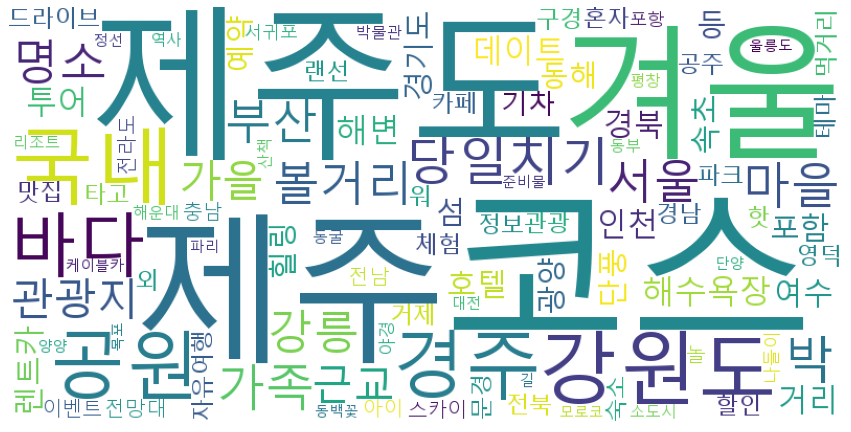

In [52]:
wordcloud=WordCloud(font_path = font_path,
                background_color="white",
                   max_words=100,
                   relative_scaling=0.3,
                   width = 800,
                   height = 400
                   ).generate_from_frequencies(token_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

## 블로그 내용 크롤링

In [26]:
import sys
import os

import pandas as pd
import numpy as np

In [27]:
url_load = pd.read_excel("blog_url.xlsx")
num_list = len(url_load)

print(num_list)
url_load

dict = {} 

number = num_list

1050


In [153]:
for i in tqdm_notebook(range(0, number)):
    # 글 띄우기
    url = url_load["url"][i]
    driver = webdriver.Chrome(r"../driver/chromedriver.exe")
    driver.get(url)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_23672/3736523624.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, number)):


  0%|          | 0/1050 [00:00<?, ?it/s]

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_23672/3736523624.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"../driver/chromedriver.exe")


In [178]:
# 크롤링
    
try :
    # 글의 iframe 접근
    driver.switch_to.frame("mainFrame")

    target_info = {}  # 개별 블로그 내용을 담을 딕셔너리 생성

    # 제목 크롤링
    overlays = ".se-module.se-module-text.se-title-text"                        
    tit = driver.find_element_by_css_selector(overlays)
    title = tit.text

    # 글쓴이 크롤링
    overlays = ".nick"                                 
    nick = driver.find_element_by_css_selector(overlays)
    nickname = nick.text

    # 날짜 크롤링
    overlays = ".se_publishDate.pcol2"    
    date = driver.find_element_by_css_selector(overlays)
    datetime = date.text

    # 내용 크롤링
    overlays = ".se-component.se-text.se-l-default"                                 
    contents = driver.find_elements_by_css_selector(overlays)

    content_list = []
    for content in contents:
        content_list.append(content.text)
 
    content_str = ' '.join(content_list)
    
    #해시태그 크롤링
    overlays = ".ell" 
    tags = driver.find_elements_by_css_selector(overlays)

    tag_list = []
    for tag in tags:
        tag_list.append(tag.text)
 
        tag_str = ' '.join(tag_list)
    
    # 크롤링한 글은 target_info라는 딕셔너리에 담음
    target_info['title'] = title
    target_info['nickname'] = nickname
    target_info['datetime'] = datetime
    target_info['content'] = content_str
    target_info['tag'] = tag_str

    # 각각의 글은 dict라는 딕셔너리에 담음
    dict[i] = target_info
    time.sleep(1)
        
    # 크롤링 성공하면 글 제목을 출력
    print(i, title)

    # 글 하나 크롤링 후 크롬 창 닫기
    driver.close()   
    
     # 에러나면 현재 크롬창을 닫고 다음 글(i+1)로 이동
except:
    driver.close()
    time.sleep(1)
    continue
    
# 중간 저장 (없어도됨)
if i == 30 or 50 or 80:
    # 판다스로 만들기
    import pandas as pd
    result_df = pd.DataFrame.from_dict(dict, 'index')

    # 저장하기
    result_df.to_excel("blog_content.xlsx", encoding='utf-8-sig')   # 한글은 오류날 수 있어서 encoding 추가
    time.sleep(3)

print('수집한 글 갯수: ', len(dict))
print(dict)

dict[0]
        

SyntaxError: 'continue' not properly in loop (Temp/ipykernel_23672/2219300827.py, line 65)

In [ ]:
# 판다스화
result_df = pd.DataFrame.from_dict(dict, 'index')
result_df

# 엑셀 저장
result_df.to_excel("blog_content.xlsx", encoding='utf-8-sig')